<a href="https://colab.research.google.com/github/RVSAITEJA/SENTIMENTAL-ANALYSIS-USING-TWEEPY-/blob/main/TM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def scrape(username,max_tweets):
    tweets_list1 = []
    ll = ['from',username]
    l = ':'
    l = l.join(ll)
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(l).get_items()):
        if i>max_tweets-1:
            break
        tweets_list1.append([tweet.content])
    tweets_df1 = pd.DataFrame(tweets_list1, columns=['Text'])
    return(tweets_df1)

df1 = scrape('elonmusk',10**4)
df1

,Text
0,@dogeofficialceo @MrBeast Written content too
1,@MrBeast Let’s see what happens when Twitter o...
2,The Tactics of Mistake
3,@mosstache 💯🎯🤣
4,Twitter added 1.6M daily active users this pas...
...,...
9995,"@Teslarati Sorry, migh have brought the site down"
9996,"Starship orbital vehicle SN1, liquid oxygen he..."
9997,@nntaleb Just saw this today. Tesla refunds in...
9998,@ErlendMoberget @ramez @KHayhoe Very true. Wha...


In [ ]:
df = df1['Text']  # makes df a series

all_sentences = [] # make a list whose each element is a single tweet
for word in df:
    all_sentences.append(word)
print(all_sentences)

['@dogeofficialceo @MrBeast Written content too', '@MrBeast Let’s see what happens when Twitter offers good video with higher compensation for creators …', 'The Tactics of Mistake', '@mosstache 💯🎯🤣', 'Twitter added 1.6M daily active users this past week, another all-time high https://t.co/Si3cRYnvyD', 'Holding off relaunch of Blue Verified until there is high confidence of stopping impersonation. \n\nWill probably use different color check for organizations than individuals.', '@egoraptor lmao', '@PPathole Dune. Amazing to think it was written in 1965!', '@WSJ @WSJopinion @AllysiaFinley Yeah umm … that is definitely not the reason it failed', '@Jason 🤣', 'Starlink now works for high latitudes https://t.co/Ngdh8CJbCJ', 'Tesla Megapacks are highly effective in addressing electricity demand spikes that cause power outages https://t.co/V4n5c4ZvNH', '@JamesSpiro @Israel @taylorswift13 I have! It was great.', '@cb_doge @DanSum519 @stillgray Not many tbh', '@Israel @taylorswift13 Your tweets 

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
pos, neg, neu, oberall, positive, negative, neutral = ([] for i in range(7))

for i in range(len(df)):  
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(df[i])
    pos.append(sentiment_dict['pos']*100)
    neg.append(sentiment_dict['neg']*100)
    neu.append(sentiment_dict['neu']*100)
    if sentiment_dict['compound'] >= 0.05 :
      positive.append(1)
 
    elif sentiment_dict['compound'] <= - 0.05 :
      negative.append(-1)
 
    else :
      neutral.append(0)

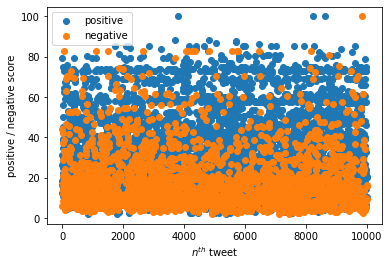

In [ ]:
def zero_to_nan(sample): 
    return [np.nan if x==0 else x for x in sample]
pos,neg = zero_to_nan(pos),zero_to_nan(neg)

plt.scatter(np.arange(1,len(df)+1,1),pos,label='positive')
plt.scatter(np.arange(1,len(df)+1,1),neg,label='negative')
plt.xlabel('$n^{th}$ tweet')
plt.ylabel('positive / negative score')
plt.legend(loc='best')
plt.show()

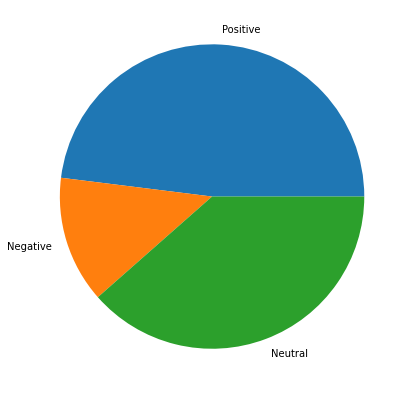

In [ ]:
sentiments = ['Positive', 'Negative', 'Neutral']
analysis = [len(positive),len(negative),len(neutral)]
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(analysis, labels = sentiments)
plt.show()

In [ ]:
df = df1['Text']
all_sentences = []
for word in df:
    all_sentences.append(word)

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

import re
lines = [re.sub(r'[^@A-Za-z0-9]+', '', x) for x in lines]
print(lines)

['@dogeofficialceo', '@MrBeast', 'Written', 'content', 'too', '@MrBeast', 'Lets', 'see', 'what', 'happens', 'when', 'Twitter', 'offers', 'good', 'video', 'with', 'higher', 'compensation', 'for', 'creators', '', 'The', 'Tactics', 'of', 'Mistake', '@mosstache', '', 'Twitter', 'added', '16M', 'daily', 'active', 'users', 'this', 'past', 'week', 'another', 'alltime', 'high', 'httpstcoSi3cRYnvyD', 'Holding', 'off', 'relaunch', 'of', 'Blue', 'Verified', 'until', 'there', 'is', 'high', 'confidence', 'of', 'stopping', 'impersonation', 'Will', 'probably', 'use', 'different', 'color', 'check', 'for', 'organizations', 'than', 'individuals', '@egoraptor', 'lmao', '@PPathole', 'Dune', 'Amazing', 'to', 'think', 'it', 'was', 'written', 'in', '1965', '@WSJ', '@WSJopinion', '@AllysiaFinley', 'Yeah', 'umm', '', 'that', 'is', 'definitely', 'not', 'the', 'reason', 'it', 'failed', '@Jason', '', 'Starlink', 'now', 'works', 'for', 'high', 'latitudes', 'httpstcoNgdh8CJbCJ', 'Tesla', 'Megapacks', 'are', 'highly

In [ ]:
mentions = pd.DataFrame([x for x in lines if x.startswith('@')])
mentions[0].value_counts()

@PPathole           455
@WholeMarsBlog      452
@SpaceX             407
@teslaownersSV      387
@Erdayastronaut     370
                   ... 
@douglewinenergy      1
@BrosForDecarb        1
@Dogecoinxx           1
@MemeInvestors        1
@macshlibber          1
Name: 0, Length: 3206, dtype: int64

In [ ]:
df2 = df1.iloc[df.str.contains(pat = '@SpaceX')[df.str.contains(pat = '@SpaceX')].index.values]
df2

,Text
197,"@SenBillNelson @NASA @SpaceX Much appreciated,..."
298,@jessica_kirsh @SpaceX @TeslaAIBot @Tesla Cool :)
597,@Erdayastronaut @SpaceForceDoD @SLDelta45 @Spa...
730,@MarcusHouse @LordofEa @kerrikgray @chicago_gl...
740,@LordofEa @kerrikgray @chicago_glenn @Tesla @t...
...,...
9921,@HarryStoltz1 @Erdayastronaut @SpaceX First tw...
9953,@TJ_Cooney @SpaceX Nice shot
9962,@SpaceX Dragon trunk from in-flight abort test...
9964,@JimBridenstine @NASA @SpaceX @Commercial_Crew...


In [ ]:
df2 = df2['Text']  #to make df a series

df = []
for word in df2:
    df.append(word)
print(df)

['@SenBillNelson @NASA @SpaceX Much appreciated, SpaceX will not let NASA down!', '@jessica_kirsh @SpaceX @TeslaAIBot @Tesla Cool :)', '@Erdayastronaut @SpaceForceDoD @SLDelta45 @SpaceX Falcon Heavy is a testament to the awesomeness of humanity', '@MarcusHouse @LordofEa @kerrikgray @chicago_glenn @Tesla @teslaownersSV @dvorahfr @TonyadeVitti @SpaceX @SirineAti That’s the plan, unless it is damaged in testing. What really matters is that ship &amp; booster production line is spooling up. Also, each new ship &amp; booster has incremental design improvements.', '@LordofEa @kerrikgray @chicago_glenn @Tesla @teslaownersSV @dvorahfr @TonyadeVitti @SpaceX @SirineAti Absolutely!', '@muskQu0tes @SpaceX Had to be done', '@jamesplloyd @SpaceX I do. Yes.', 'Congrats to @SpaceX team on 48th launch this year! Falcon 9 now holds record for most launches of a single vehicle type in a year.', '@SpaceX 🎯', '@TeslaAIBot @SpaceX @Tesla Thanks Optimus :)', '@SawyerMerritt @SpaceX To be precise, 25,300 term

In [ ]:
pos, neg, neu, oberall, positive, negative, neutral = ([] for i in range(7))
for i in range(len(df)):  
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(df[i])
    pos.append(sentiment_dict['pos']*100)
    neg.append(sentiment_dict['neg']*100)
    neu.append(sentiment_dict['neu']*100)
    if sentiment_dict['compound'] >= 0.05 :
      positive.append(1)
 
    elif sentiment_dict['compound'] <= - 0.05 :
      negative.append(-1)
 
    else :
      neutral.append(0)

def zero_to_nan(sample):
    return [np.nan if x==0 else x for x in sample]
pos,neg = zero_to_nan(pos),zero_to_nan(neg)

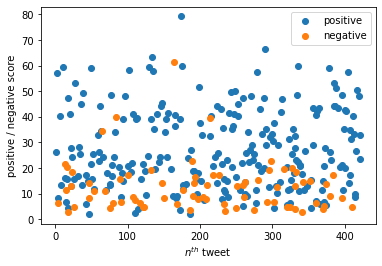

In [ ]:
plt.scatter(np.arange(1,len(df)+1,1),pos,label='positive')
plt.scatter(np.arange(1,len(df)+1,1),neg,label='negative')
plt.xlabel('$n^{th}$ tweet')
plt.ylabel('positive / negative score')
plt.legend(loc='best')
plt.show()

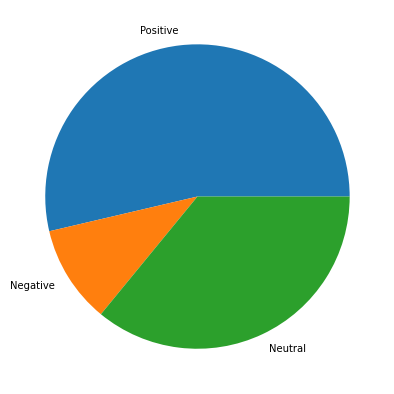

In [ ]:
sentiments = ['Positive', 'Negative', 'Neutral']
analysis = [len(positive),len(negative),len(neutral)]
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(analysis, labels = sentiments)
plt.show()